<a href="https://colab.research.google.com/github/blake-tisbury/HACKERMANLLC/blob/master/MLHandwrittingDectector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
mnist = keras.datasets.mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  # split into tetsing and training

train_images = train_images / 255.0

test_images = test_images / 255.0

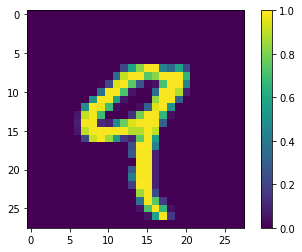

In [ ]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

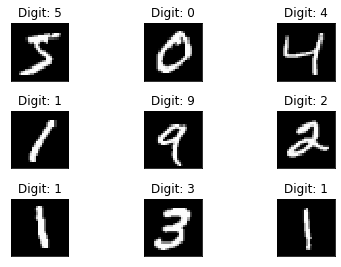

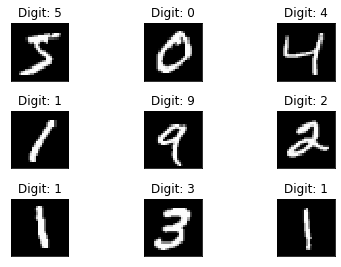

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (0)
    keras.layers.Dense(2048, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(1024, activation='relu'),  # hidden layer (3)
    keras.layers.Dense(512, activation='relu'),  # hidden layer (4)
    keras.layers.Dense(256, activation='relu'),  # hidden layer (5)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (6)
    keras.layers.Dense(64, activation='relu'),  # hidden layer (7)
    keras.layers.Dense(32, activation='relu'),  # hidden layer (8)
    keras.layers.Dense(16, activation='relu'),  # hidden layer (7)
    keras.layers.Dense(10, activation='softmax') # output layer (8)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0221 - accuracy: 0.9965
Epoch 2/7
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0168 - accuracy: 0.9971
Epoch 3/7
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0209 - accuracy: 0.9963
Epoch 4/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0159 - accuracy: 0.9973
Epoch 5/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0253 - accuracy: 0.9945
Epoch 6/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0121 - accuracy: 0.9977
Epoch 7/7
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0279 - accuracy: 0.9949


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1758 - accuracy: 0.9816
Test accuracy: 0.9815999865531921
